# Academic videos

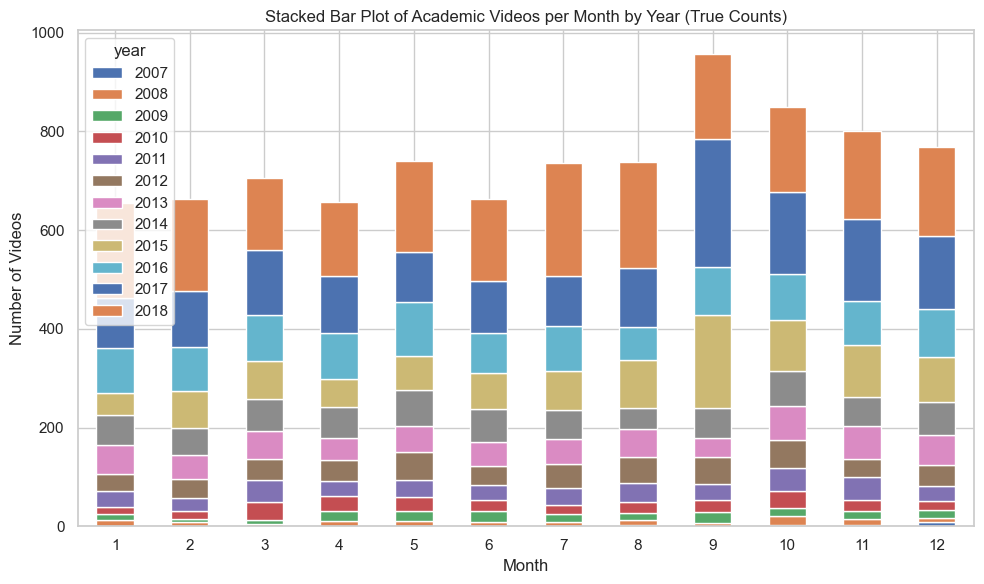

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2019 as the number of videos is too low to make any statistical analysis (year 2019 is not finished on the dataset)
years = np.arange(2007, 2019)
classified = classified[classified['year'].isin(years)]
academic = classified[classified['label'] == 'academic']

# Compute monthly count per year
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of Academic Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("./data/figures/hybs/academic_videos_per_month_by_year.png")
plt.show()

# Plotly
# Reset the index and ensure 'month' is included
monthly_counts_reset = monthly_counts.T.reset_index().rename(columns={'index': 'month'})
# Convert the DataFrame to a long format for Plotly
monthly_counts_long = monthly_counts_reset.melt(id_vars='month', var_name='year', value_name='count')

# Plot with Plotly
fig_plotly = px.bar(
    monthly_counts_long,
    x='month',
    y='count',
    color='year',
    title='Stacked Bar Plot of Academic Videos per Month by Year (True Counts)',
    labels={'month': 'Month', 'count': 'Number of Videos', 'year': 'Year'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Dark2,
)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_indices = list(range(1, 13))  # Assuming months are represented numerically as 1-12

# Update x-axis for month labels
fig_plotly.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=month_indices,
        ticktext=months,
        title='Month'
    ),
    yaxis_title='Number of Videos',
    legend_title='Year',
    title_x=0.5
)

fig_plotly.write_html(f"./data/figures/hybs/academic_videos_per_month_by_year.html")
# fig_plotly.show()

### chi² with total sample distrib

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2019 as the number of videos is too low to make any statistical analysis (2019 is not finished in the dataset)
years = np.arange(2007, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'academic']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


51.04200520476077 4.0627904907882806e-07


### Which year is responsible for the divergence

Year: 2008, Chi-square Statistic: 10.81, p-value: 0.4591
Year: 2009, Chi-square Statistic: 14.36, p-value: 0.2138
Year: 2010, Chi-square Statistic: 22.63, p-value: 0.0199
Year: 2011, Chi-square Statistic: 9.20, p-value: 0.6036
Year: 2012, Chi-square Statistic: 9.35, p-value: 0.5896
Year: 2013, Chi-square Statistic: 13.33, p-value: 0.2723
Year: 2014, Chi-square Statistic: 13.16, p-value: 0.2830
Year: 2015, Chi-square Statistic: 129.13, p-value: 0.0000
Year: 2016, Chi-square Statistic: 16.23, p-value: 0.1330
Year: 2017, Chi-square Statistic: 130.80, p-value: 0.0000
Year: 2018, Chi-square Statistic: 45.68, p-value: 0.0000


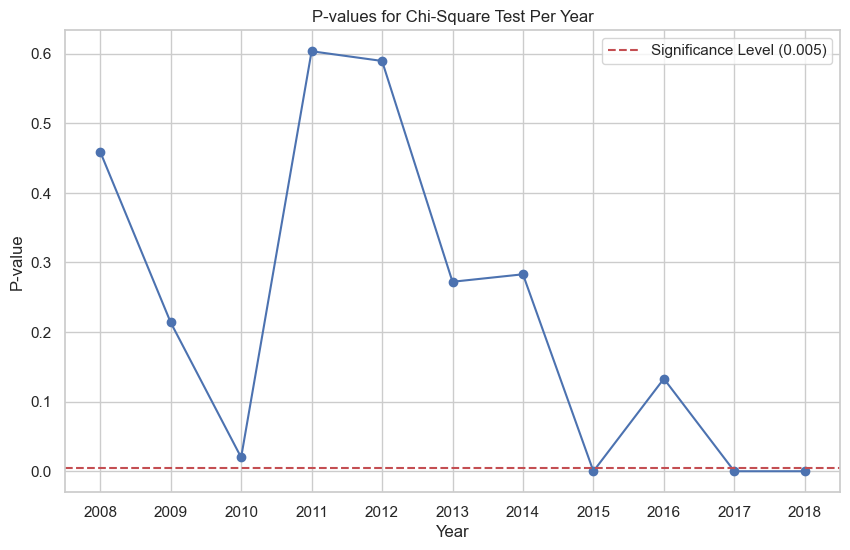

In [ ]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007, 2019 as the number of videos is too low (2007 do not contains value for every month so not possible to compute chisquare)
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'academic']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.savefig(f"./data/figures/hybs/academic_chisquare_p_value_per_year.png")
plt.show()

# Plotly
fig_plotly = go.Figure()
# Add P-values as a line
fig_plotly.add_trace(go.Scatter(
    x=years,
    y=p_values,
    mode='lines+markers',
    name='P-values'
))
# Add the significance level line
fig_plotly.add_trace(go.Scatter(
    x=years,
    y=[0.005] * len(years),
    mode='lines',
    name='Significance Level (0.005)',
    line=dict(color='red', dash='dash')
))
# Update layout
fig_plotly.update_layout(
    title='P-values for Chi-Square Test Per Year',
    xaxis_title='Year',
    yaxis_title='P-value',
    xaxis=dict(
        tickmode='linear', 
        dtick=1, 
        showgrid=True, 
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='P-value', 
        showgrid=True, 
        gridcolor='lightgrey'
    ),
    legend_title='Legend',
    title_x=0.5,
    template='plotly_white'
)

fig_plotly.write_html(f"./data/figures/hybs/academic_chisquare_p_value_per_year.html")
# fig_plotly.show()

> looking at the p values for each year, the years that contribute to the statistical difference in distribution are the years 2010, 2015, 2017, 2018

# Edutainement videos

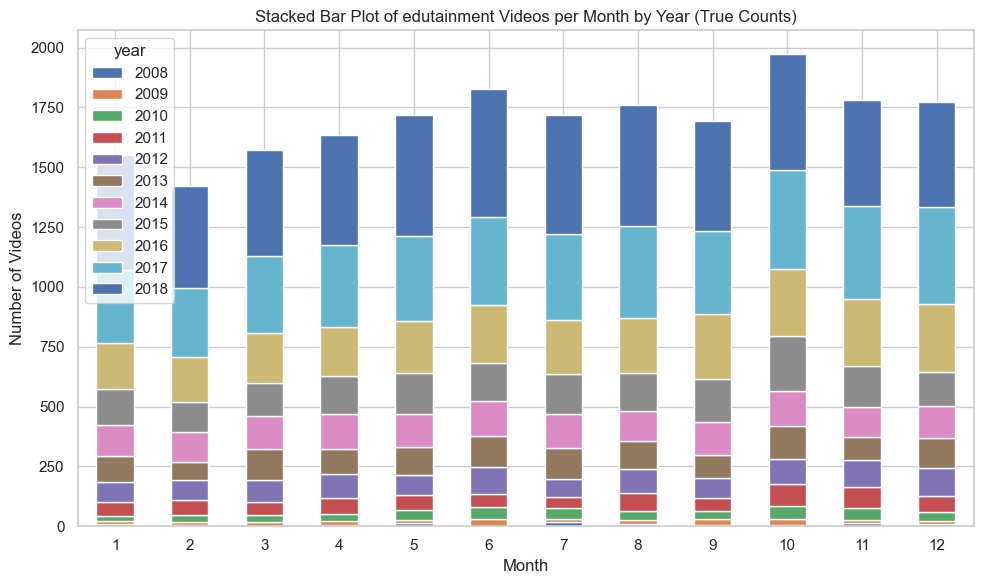

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'edutainment or science popularization']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of edutainment Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('./data/figures/hybs/edutainment_videos_per_month_by_year.png')
plt.show()

# Plot with Plotly
# Reset the index and ensure 'month' is included
monthly_counts_reset = monthly_counts.T.reset_index().rename(columns={'index': 'month'})
# Convert the DataFrame to a long format for Plotly
monthly_counts_long = monthly_counts_reset.melt(id_vars='month', var_name='year', value_name='count')
fig_plotly = px.bar(
    monthly_counts_long,
    x='month',
    y='count',
    color='year',
    title='Stacked Bar Plot of Edutainment Videos per Month by Year (True Counts)',
    labels={'month': 'Month', 'count': 'Number of Videos', 'year': 'Year'},
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Dark2,
)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_indices = list(range(1, 13))  # Assuming months are represented numerically as 1-12

# Update x-axis for month labels
fig_plotly.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=month_indices,
        ticktext=months,
        title='Month'
    ),
    yaxis_title='Number of Videos',
    legend_title='Year',
    title_x=0.5
)

fig_plotly.write_html(f"./data/figures/hybs/edutainment_videos_per_month_by_year.html")
# fig_plotly.show()

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'edutainment or science popularization']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


18.13754997540116 0.07844335614097438


# Hobby videos

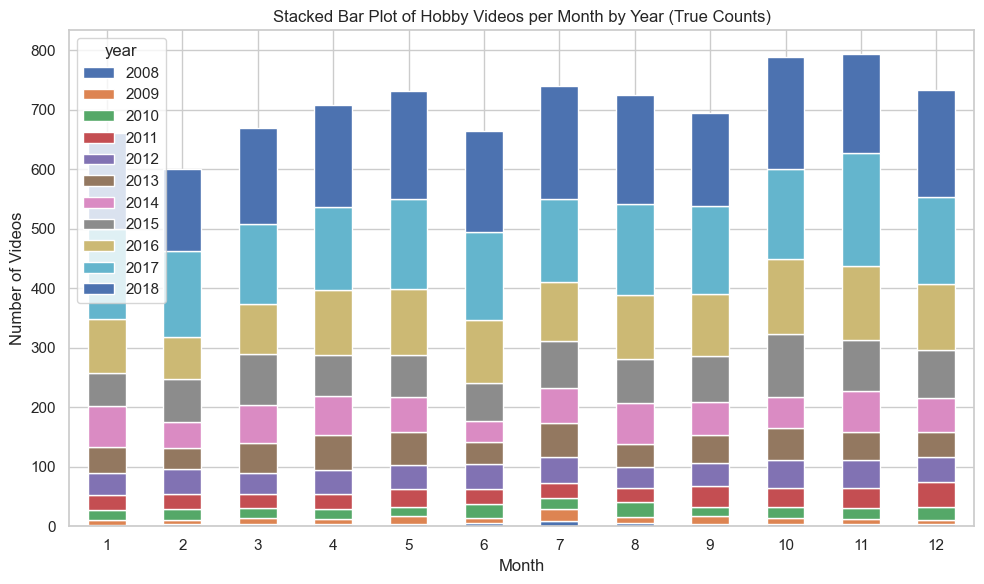

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'hobby']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby(['year', 'month']).size().unstack(fill_value=0)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

monthly_counts.T.plot(
    kind='bar', 
    stacked=True, 
    ax=ax
)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Videos')
ax.set_title('Stacked Bar Plot of Hobby Videos per Month by Year (True Counts)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Retrieve academic videos
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['month'] = classified['upload_date'].dt.month
# Remove 2005, 2006, 2007 as the number of videos is too low to make any statistical analysis
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

academic = classified[classified['label'] == 'hobby']

# Remove non-complete years to avoid distortion
monthly_counts = academic.groupby('month').size()

# distribution for the whols sample
total = classified.groupby('month').size()
total_scaled = total * (monthly_counts.sum() / total.sum())


chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
print(chi_stat, p_value)


13.011357739410267 0.29258372101700975


Year: 2008, Chi-square Statistic: 6.25, p-value: 0.8564
Year: 2009, Chi-square Statistic: 13.01, p-value: 0.2929
Year: 2010, Chi-square Statistic: 5.16, p-value: 0.9231
Year: 2011, Chi-square Statistic: 7.48, p-value: 0.7587
Year: 2012, Chi-square Statistic: 4.19, p-value: 0.9639
Year: 2013, Chi-square Statistic: 15.18, p-value: 0.1744
Year: 2014, Chi-square Statistic: 22.45, p-value: 0.0211
Year: 2015, Chi-square Statistic: 13.72, p-value: 0.2489
Year: 2016, Chi-square Statistic: 9.70, p-value: 0.5579
Year: 2017, Chi-square Statistic: 14.23, p-value: 0.2204
Year: 2018, Chi-square Statistic: 8.46, p-value: 0.6717


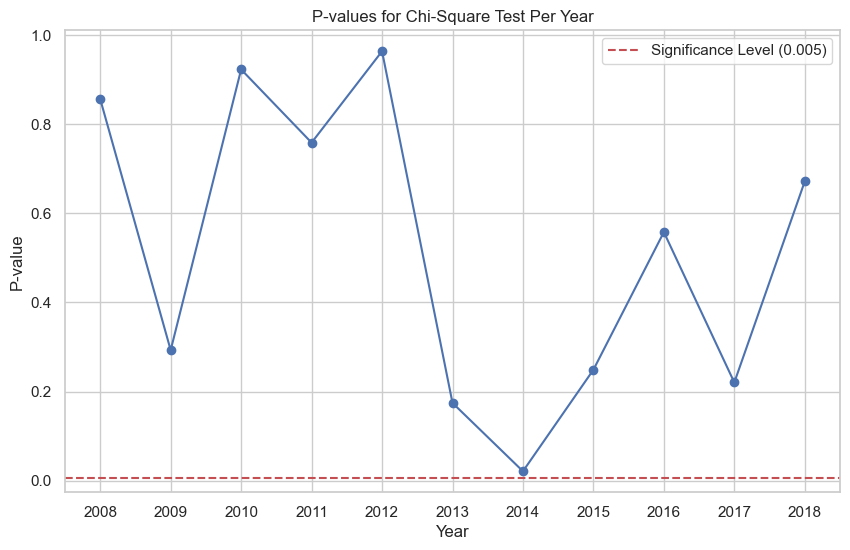

In [ ]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 as the number of videos is too low
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'hobby']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.show()


Year: 2008, Chi-square Statistic: 27.01, p-value: 0.0046
Year: 2009, Chi-square Statistic: 12.76, p-value: 0.3090
Year: 2010, Chi-square Statistic: 15.42, p-value: 0.1640
Year: 2011, Chi-square Statistic: 23.88, p-value: 0.0133
Year: 2012, Chi-square Statistic: 17.77, p-value: 0.0870
Year: 2013, Chi-square Statistic: 21.45, p-value: 0.0290
Year: 2014, Chi-square Statistic: 11.26, p-value: 0.4220
Year: 2015, Chi-square Statistic: 17.12, p-value: 0.1043
Year: 2016, Chi-square Statistic: 18.87, p-value: 0.0634
Year: 2017, Chi-square Statistic: 9.94, p-value: 0.5361
Year: 2018, Chi-square Statistic: 42.31, p-value: 0.0000


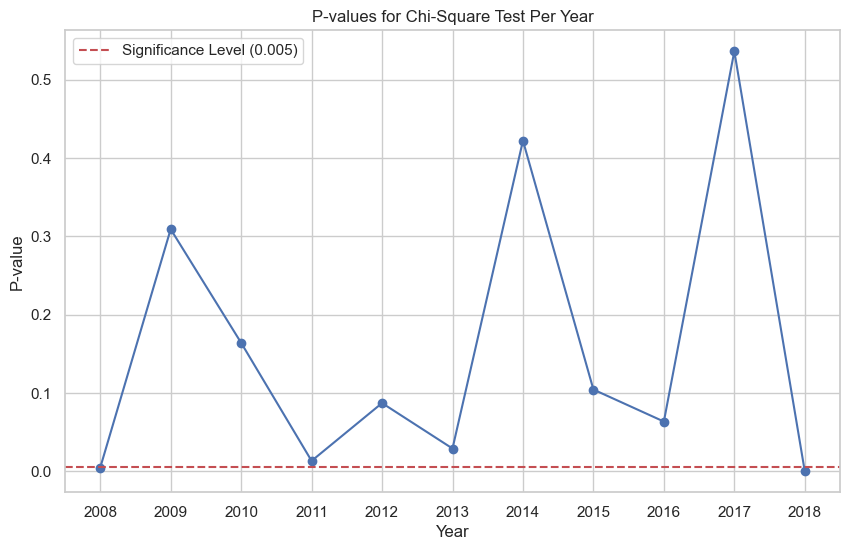

In [ ]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 as the number of videos is too low
years = np.arange(2008, 2019)
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'edutainment or science popularization']

# Overall distribution for the total sample (across all years)
total = classified.groupby('month').size()

# Initialize storage for p-values
p_values = []

# Perform chi-square test for each year
for year in years:
    # Get monthly counts for academic videos for the current year
    monthly_counts = academic[academic['year'] == year].groupby('month').size()
    
    # Get total scaled distribution for the current year
    total_scaled = total * (monthly_counts.sum() / total.sum())
    
    # Perform chi-square test
    chi_stat, p_value = chisquare(f_obs=monthly_counts, f_exp=total_scaled)
    p_values.append(p_value)
    print(f"Year: {year}, Chi-square Statistic: {chi_stat:.2f}, p-value: {p_value:.4f}")

# Plot p-values to visualize the contribution of each year
plt.figure(figsize=(10, 6))
plt.plot(years, p_values, marker='o')
plt.axhline(0.005, color='r', linestyle='--', label='Significance Level (0.005)')
plt.title('P-values for Chi-Square Test Per Year')
plt.xlabel('Year')
plt.ylabel('P-value')
plt.xticks(years)
plt.legend()
plt.grid('on')
plt.show()


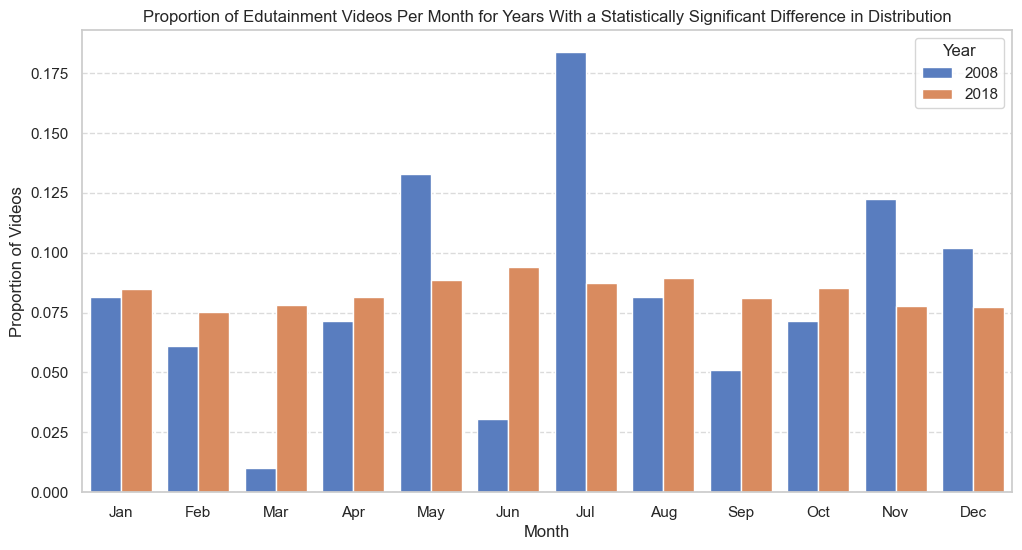

In [ ]:
# Load the data
classified = pd.read_csv(r'data\raw\Education_videos_classified_BART_50000_3_labels.csv')
classified['classified_labels'] = classified['classified_labels'].apply(ast.literal_eval)
classified['label'] = classified['classified_labels'].apply(lambda x: x[0])
classified['upload_date'] = pd.to_datetime(classified['upload_date'])
classified['year'] = classified['upload_date'].dt.year
classified['month'] = classified['upload_date'].dt.month

# Remove 2005, 2006, 2007 and filter for specific years
years = [2008, 2018]
classified = classified[classified['year'].isin(years)]

# Filter for academic videos
academic = classified[classified['label'] == 'edutainment or science popularization']

# Group by year and month to compute the counts
monthly_counts = academic.groupby(['year', 'month']).size().reset_index(name='count')

# Compute proportions within each year
monthly_counts['proportion'] = monthly_counts.groupby('year')['count'].transform(lambda x: x / x.sum())

# Plot the proportions using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_counts, x='month', y='proportion', hue='year', palette='muted')

# Customize the plot
plt.title('Proportion of Edutainment Videos Per Month for Years With a Statistically Significant Difference in Distribution')
plt.xlabel('Month')
plt.ylabel('Proportion of Videos')
plt.legend(title='Year')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Time series

In [ ]:
df_ch = pd.read_csv("./data/raw/df_channels_en.tsv.gz", compression="infer", sep="\t")
df_ch = df_ch.dropna()
df_ch["join_date"] = pd.to_datetime(df_ch["join_date"])
df_ch['year'] = df_ch['join_date'].dt.year.astype(int)


df_ts = pd.read_csv("./data/raw/df_timeseries_en.tsv.gz", compression="infer", sep="\t")
df_ts = df_ts.dropna()
df_ts['datetime'] = pd.to_datetime(df_ts['datetime'])
df_ts['year'] = df_ts['datetime'].dt.year
df_ts['month'] = df_ts['datetime'].dt.month

# Specific channel case study

In [ ]:
def plot_stats_channel(channel, year) :
    channel_id = df_ch[df_ch['name_cc'] == channel]['channel'].values.item()
    data = df_ts[df_ts['channel'] == channel_id]
    data = data[data['year'] == year]

    sns.set_theme(style="whitegrid")

    palette = sns.color_palette("deep", n_colors=2)
    views_color = palette[0]
    videos_color = palette[1]

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create the twin axis first so bars appear behind
    ax2 = ax.twinx()

    # Plot delta_videos as bars on the secondary y-axis first (behind)
    sns.lineplot(data=data, y='videos', x='datetime', color=videos_color, ax=ax2, marker='o', alpha=0.7, legend=False)
    ax2.set_ylabel("Videos", color=videos_color)
    ax2.tick_params(axis='y', labelcolor=videos_color)

    # Plot delta_views as a line on the primary y-axis, in front
    sns.lineplot(data=data, y='delta_views', x='datetime', color=views_color, marker='o', ax=ax, legend=False)
    ax.set_xlabel("Datetime")
    ax.set_ylabel("Delta Views", color=views_color)
    ax.tick_params(axis='y', labelcolor=views_color)
    ax.set_title(f"{channel} Delta Views and Delta Videos Over Time for the year {year}")

    # Adjust z-order and transparency so line is on top
    ax.set_zorder(2)
    ax.patch.set_visible(False)

    # Manually create a single combined legend
    line_legend = plt.Line2D([0], [0], color=views_color, marker='o', label='Delta Views')
    bar_legend = plt.Line2D([0], [0], color=videos_color, marker='o', label='Delta Videos')

    ax.legend([line_legend, bar_legend], ['Delta Views', 'Videos'], loc='upper left')

    plt.tight_layout()
    plt.savefig(f"./data/figures/hybs/stats_channel_{channel}_{year}.png")
    plt.show()

    # Create the Plotly figure
    fig = go.Figure()
    # Add line plot for Delta Views
    fig.add_trace(go.Scatter(
        x=data['datetime'],
        y=data['delta_views'],
        mode='lines+markers',
        name='Delta Views',
        line=dict(color='rgb(31, 119, 180)'),  # Deep blue color
        marker=dict(color='rgb(31, 119, 180)')
    ))
    # Add line plot for Delta Videos
    fig.add_trace(go.Scatter(
        x=data['datetime'],
        y=data['delta_videos'],
        mode='lines+markers',
        name='Delta Videos',
        yaxis='y2',  # Link to secondary y-axis
        line=dict(color='rgb(255, 127, 14)'),  # Deep orange color
        marker=dict(color='rgb(255, 127, 14)')
    ))
    # Customize the layout with grid
    fig.update_layout(
        title=f'{channel} Delta Views and Delta Videos Over Time for the Year {year}',
        title_x = 0.5,
        xaxis=dict(
            title='Datetime',
            showgrid=True,  # Add grid for the x-axis
            gridcolor='lightgrey',  # Set grid line color
            gridwidth=1  # Set grid line width
        ),
        yaxis=dict(
            title=dict(
                text='Delta Views',
                font=dict(color='rgb(31, 119, 180)')
            ),
            tickfont=dict(color='rgb(31, 119, 180)'),
            showgrid=True,  # Add grid for the primary y-axis
            gridcolor='lightgrey',  # Set grid line color
            gridwidth=1  # Set grid line width
        ),
        yaxis2=dict(
            title=dict(
                text='Delta Videos',
                font=dict(color='rgb(255, 127, 14)')
            ),
            tickfont=dict(color='rgb(255, 127, 14)'),
            overlaying='y',  # Overlay second y-axis
            side='right',  # Place second axis on the right side
            showgrid=False  # No grid for the secondary y-axis to avoid clutter
        ),
        legend=dict(
            title='Metric',
            x=0.5,
            xanchor='center',
            orientation='h'
        ),
        template='plotly_white'
    )
    # Show the plot
    fig.write_html(f"./data/figures/hybs/stats_channel_{channel}_{year}.html")
    # fig.show()

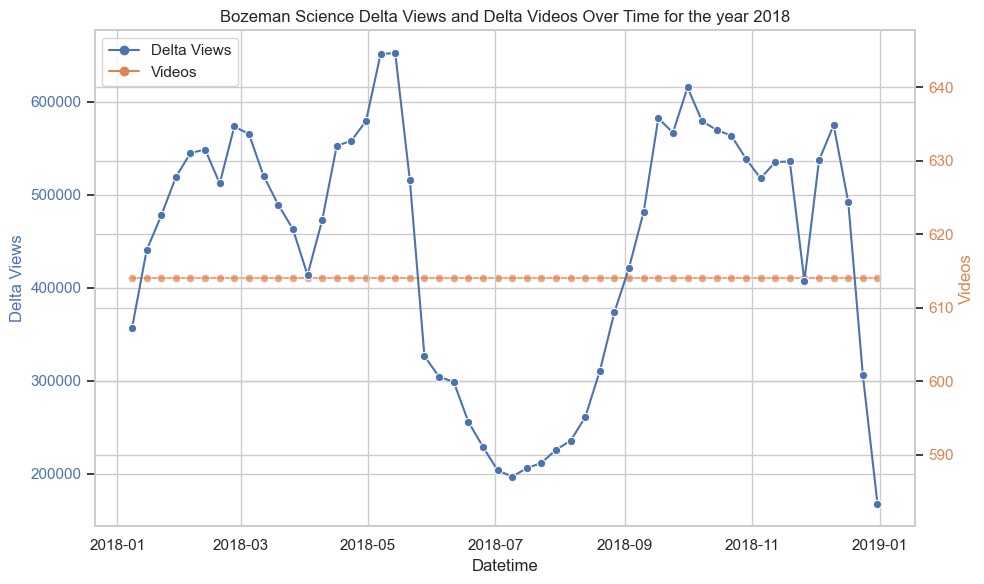

In [ ]:
plot_stats_channel('Bozeman Science', 2018)